<a href="https://colab.research.google.com/github/GiliardGodoi/bioinfo-sars-cov2-datasets/blob/main/EstudoCaso_1_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória das Características Extraídas

Os dados podem ser obtidos diretamente de:
https://github.com/GiliardGodoi/bioinfo-sars-cov2-datasets

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import os
from os import path

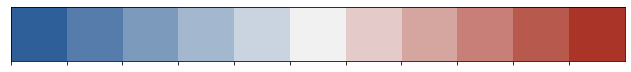

In [ ]:
color_map = sns.diverging_palette(250, 15, s=80, l=40, n=11, center="light", as_cmap=True)
sns.palplot(sns.diverging_palette(250, 15, s=80, l=40, n=11, center="light",))

In [ ]:
base = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2"
features = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed"
# results = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/results"

In [ ]:
# Diretórios com as características extraídas.

folders = os.listdir(features)

print(folders,'\n')

folder = folders[0]

print(folder,'\n')

os.listdir(path.join(features, folder))

['1-covid', '2-other-viruses'] 

1-covid 



['chaos-game-theory_r4.csv',
 'complex-network-k3l10.csv',
 'fourier-class-r5.csv',
 'shannon-entropy-k12.csv']

## Carregando os *datasets*

In [ ]:
df_fourier = pd.read_csv(path.join(features, folder,'fourier-class-r5.csv'))
df_fourier.name = "Fourier Features"
print('Transformada Fourier', df_fourier.shape)

Transformada Fourier (1717, 21)


In [ ]:
df_fourier[['nameseq', 'label']].groupby('label').count()

,nameseq
label,
0,403
1,1314


In [ ]:
df_fourier.describe()

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
count,1717.000000,1717.000000,1.717000e+03,1.717000e+03,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1.717000e+03,1.717000e+03,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000
mean,447.278703,8.242957,1.297399e+07,8.156109e-04,22.191485,3112.344747,75111.824365,75113.084034,1.930194,3.409589,8.242957,16.531972,1.297399e+07,5.655044e+09,13.122383,6.561191,167.719073,0.017611,0.251011,0.765288
std,18.638292,0.438657,6.973541e+05,7.801137e-04,0.077851,104.846359,3616.084250,3616.120909,0.104835,0.185279,0.438657,0.852567,6.973541e+05,3.652575e+08,0.675262,0.337631,5.131188,0.001809,0.002667,0.423942
min,31.039999,0.610511,6.241343e+04,2.605510e-07,21.795465,725.206611,1371.455978,1371.787367,0.142964,0.249931,0.610511,1.237661,6.241343e+04,1.881801e+06,0.987730,0.493865,44.183492,0.017264,0.240694,0.000000
25%,448.324054,8.110478,1.299950e+07,2.325010e-04,22.158606,3130.115076,75293.061499,75294.324540,1.890035,3.343965,8.110478,16.303373,1.299950e+07,5.669235e+09,12.937960,6.468980,167.943386,0.017510,0.249090,1.000000
50%,449.223283,8.167770,1.305021e+07,6.050093e-04,22.159805,3136.328408,75517.649473,75518.913907,1.917839,3.375823,8.167770,16.378876,1.305021e+07,5.703106e+09,13.010227,6.505114,168.107143,0.017521,0.251060,1.000000
75%,449.819171,8.209404,1.308530e+07,1.119931e-03,22.161649,3139.796898,75670.149064,75671.414440,1.942951,3.417313,8.209404,16.460109,1.308530e+07,5.726163e+09,13.121772,6.560886,168.220402,0.017538,0.252882,1.000000
max,458.526394,9.237870,1.371578e+07,5.252069e-03,22.433215,3191.607618,78128.724490,78129.992104,2.206678,3.836119,9.237870,18.279426,1.371578e+07,6.104296e+09,14.576791,7.288395,170.390899,0.066563,0.259039,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


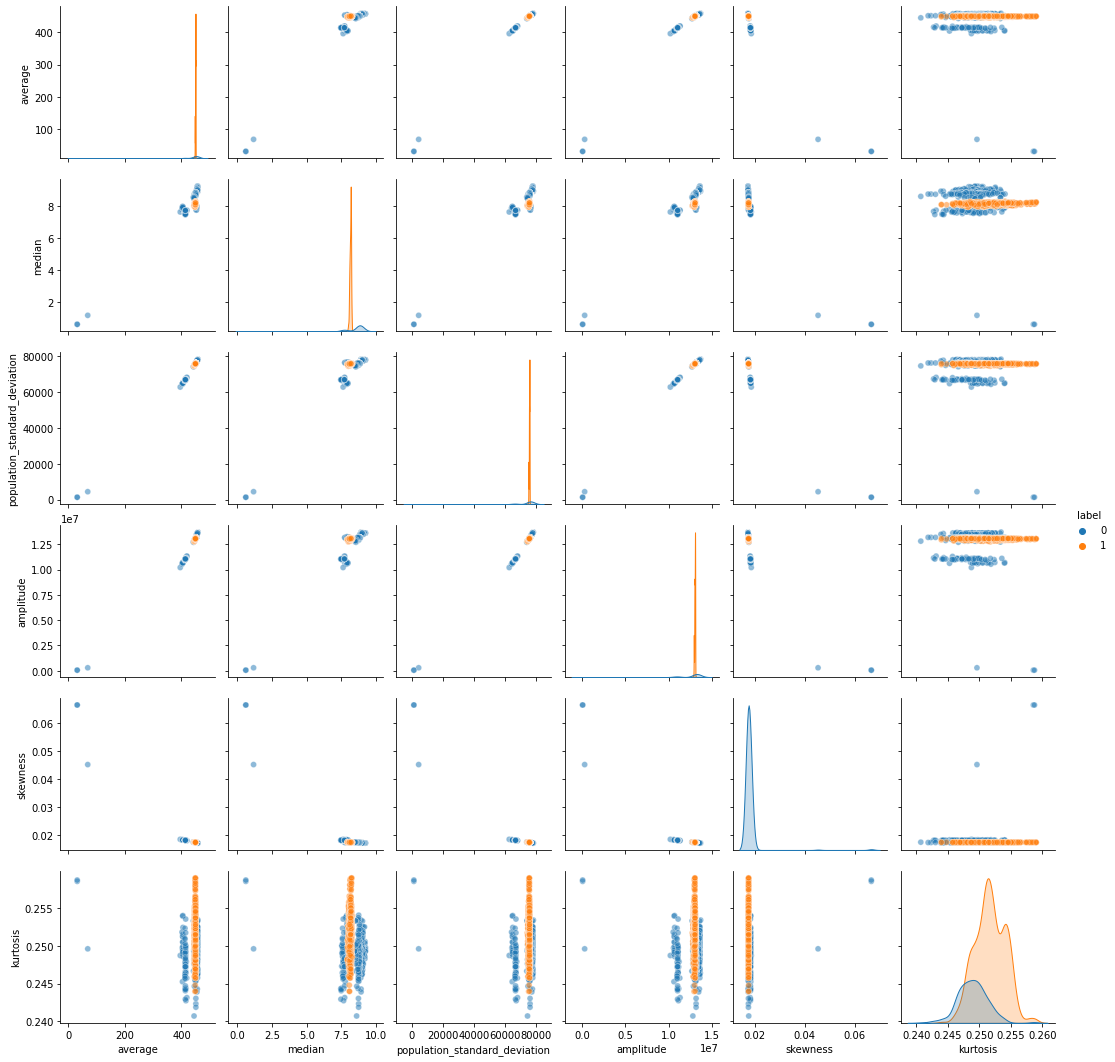

In [ ]:
col = ['average', 'median', 'population_standard_deviation', 'amplitude', 'skewness', 'kurtosis', 'label']

sns.pairplot(df_fourier[col], hue='label', plot_kws=dict(alpha=0.5))

## Análises das Características

### Transformada de Fourier

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1.0))

In [ ]:
# dimensões
df_fourier.shape

(1717, 21)

In [ ]:
# colunas
df_fourier.columns

Index(['nameseq', 'average', 'median', 'maximum', 'minimum', 'peak',
       'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis', 'label'],
      dtype='object')

In [ ]:
col = ['average', 'median', 'maximum', 'minimum', 'peak',
       'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis' ]

X = scaler.fit_transform(df_fourier[col])

df = pd.DataFrame(X, columns=col)

df['label'] = df_fourier['label']

df.head()

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
0,0.869726,0.831351,0.770662,0.093909,0.953652,0.875975,0.820163,0.820164,0.812157,0.839227,0.831351,0.860673,0.770662,0.677760,0.857879,0.857879,0.915134,0.023546,0.492294,0
1,0.876468,0.838082,0.781833,0.034287,0.955319,0.880656,0.829195,0.829196,0.815307,0.833939,0.838082,0.865511,0.781833,0.692453,0.865341,0.865341,0.919685,0.022204,0.486914,0
2,0.876613,0.845063,0.782002,0.118832,0.951218,0.879428,0.829361,0.829362,0.827930,0.854061,0.845063,0.870170,0.782002,0.692725,0.865873,0.865873,0.919739,0.022133,0.571278,0
3,0.875483,0.832059,0.780034,0.210493,0.946669,0.881797,0.827799,0.827800,0.800507,0.843725,0.832059,0.873510,0.780034,0.690172,0.872789,0.872789,0.918909,0.022473,0.534225,0
4,0.872344,0.848817,0.774824,0.069419,0.945597,0.878257,0.823590,0.823592,0.821646,0.843356,0.848817,0.865668,0.774824,0.683317,0.863053,0.863053,0.916789,0.022936,0.575654,0


In [ ]:
df.describe()

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
count,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000
mean,0.973689,0.884679,0.945670,0.155251,0.620965,0.967863,0.960696,0.960696,0.866026,0.881063,0.884679,0.897461,0.945670,0.926381,0.892972,0.892972,0.978830,0.007041,0.562379,0.765288
std,0.043600,0.050845,0.051076,0.148542,0.122071,0.042510,0.047111,0.047111,0.050799,0.051665,0.050845,0.050028,0.051076,0.059855,0.049692,0.049692,0.040657,0.036696,0.145404,0.423942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.976134,0.869324,0.947538,0.044221,0.569410,0.975068,0.963057,0.963057,0.846567,0.862764,0.869324,0.884046,0.947538,0.928707,0.879401,0.879401,0.980607,0.004988,0.457662,1.000000
50%,0.978238,0.875964,0.951253,0.115151,0.571291,0.977587,0.965983,0.965983,0.860039,0.871648,0.875964,0.888477,0.951253,0.934257,0.884719,0.884719,0.981905,0.005221,0.565062,1.000000
75%,0.979632,0.880790,0.953822,0.213197,0.574181,0.978993,0.967969,0.967970,0.872207,0.883217,0.880790,0.893244,0.953822,0.938036,0.892927,0.892927,0.982802,0.005566,0.664383,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


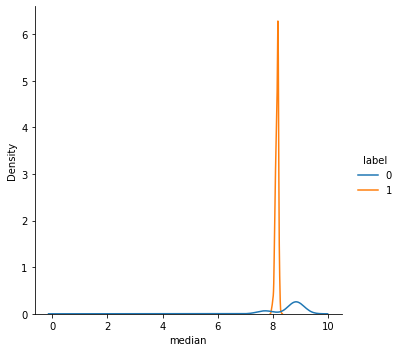

In [ ]:
sns.displot(data=df_fourier, x="median", hue="label", kind="kde")

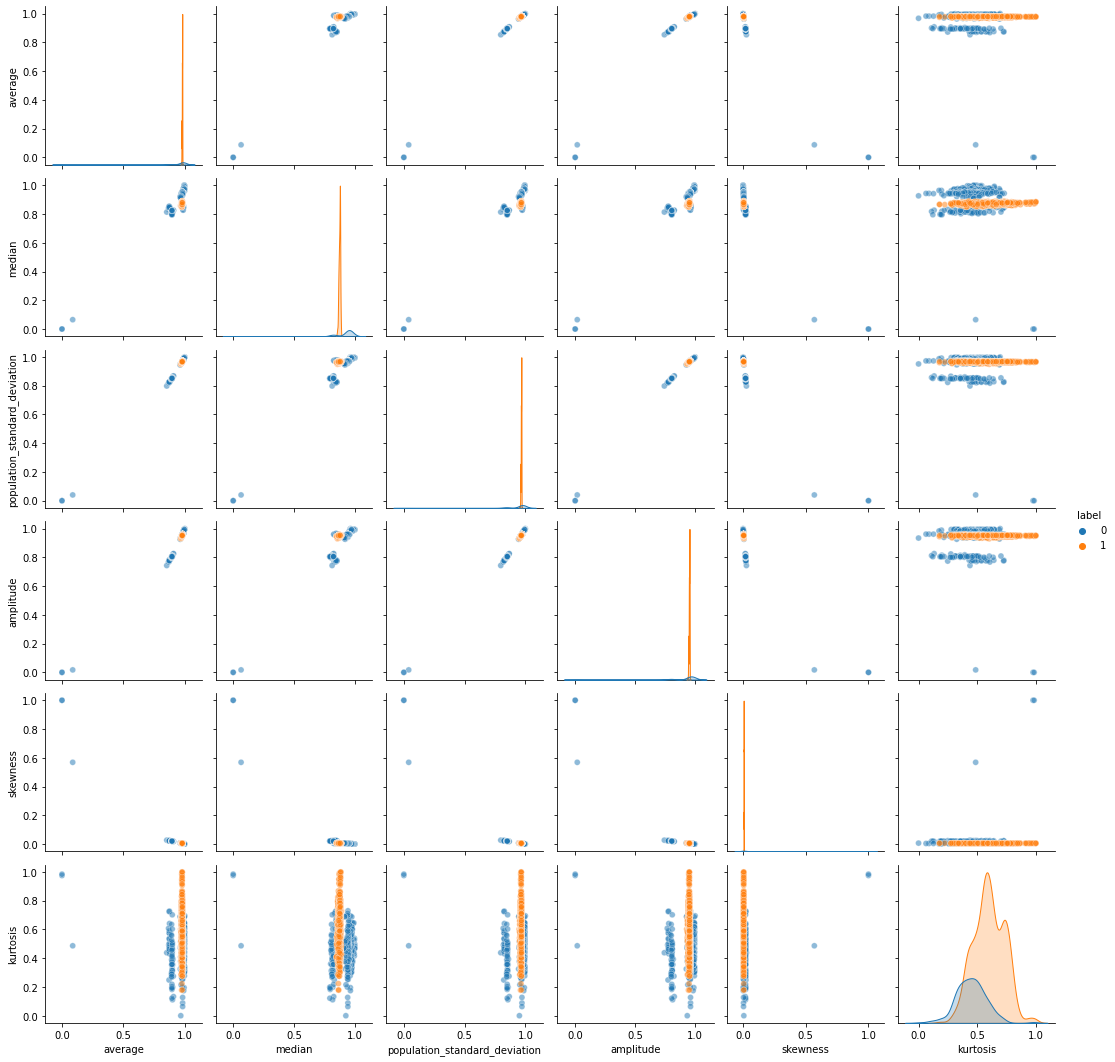

In [ ]:
col = ['average', 'median', 'population_standard_deviation', 'amplitude', 'skewness', 'kurtosis', 'label']

sns.pairplot(df[col], hue='label', plot_kws=dict(alpha=0.5))

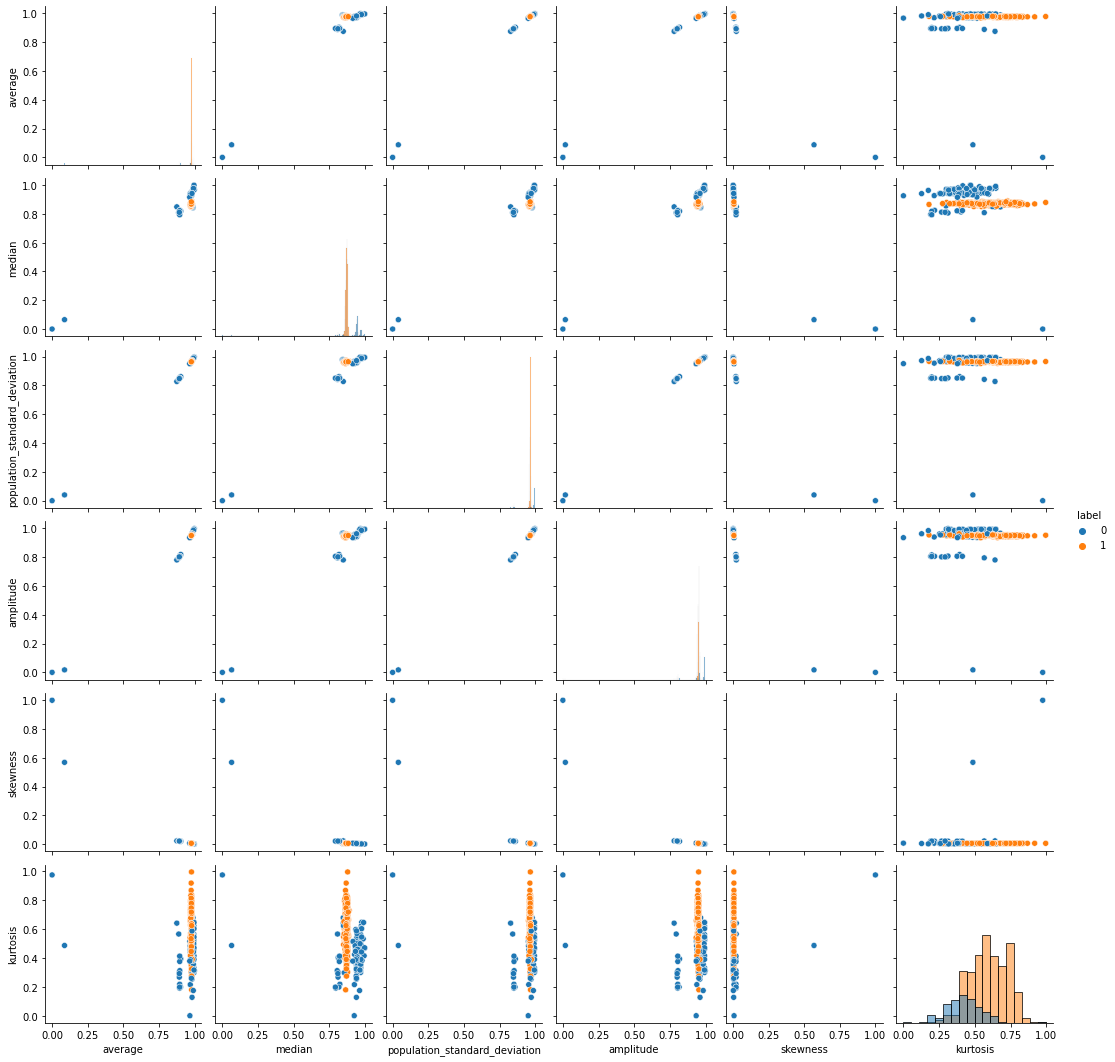

In [ ]:
sns.pairplot(df[col].sample(500), hue='label', diag_kind="hist")

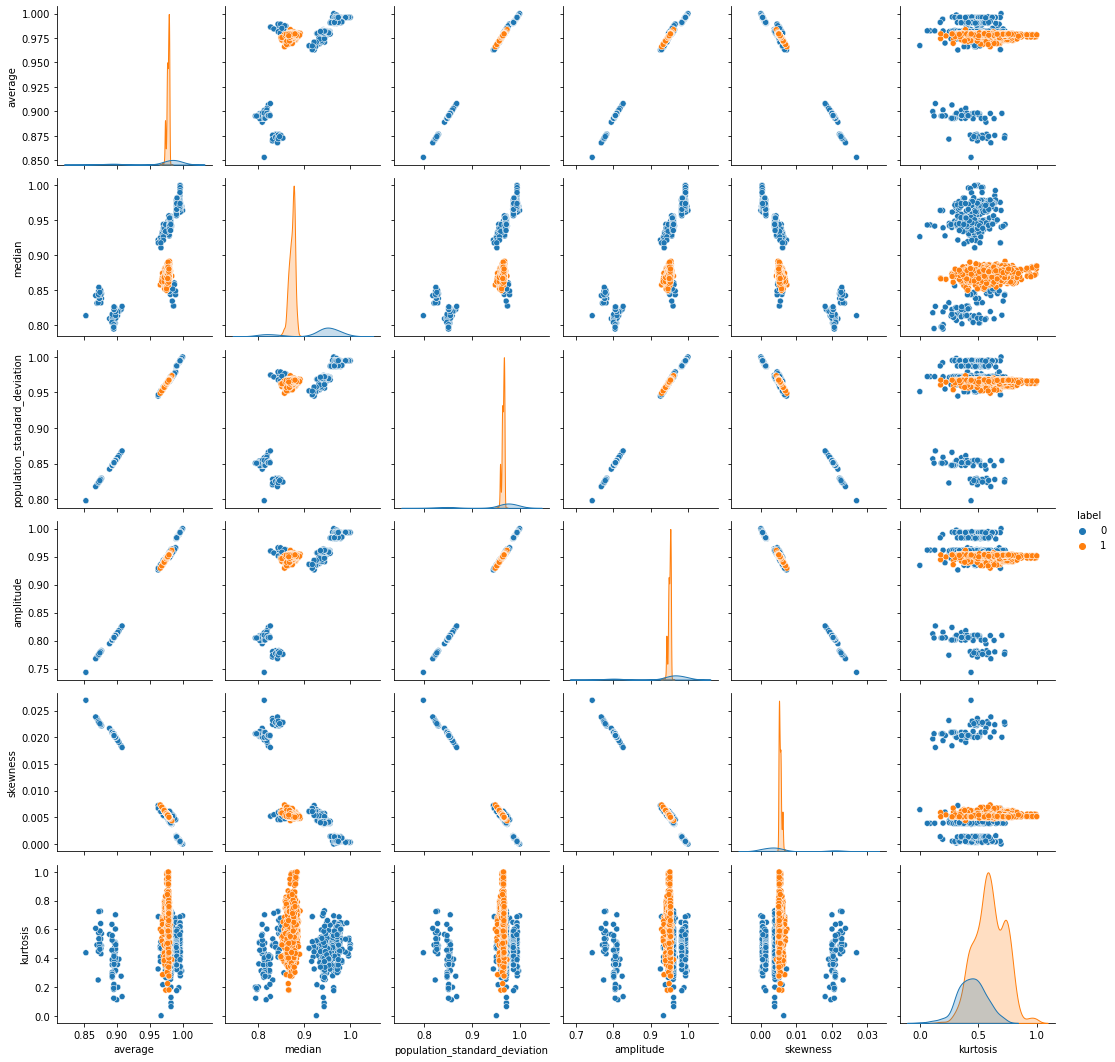

In [ ]:
sns.pairplot(df[df['average'] > 0.8][col], hue='label')

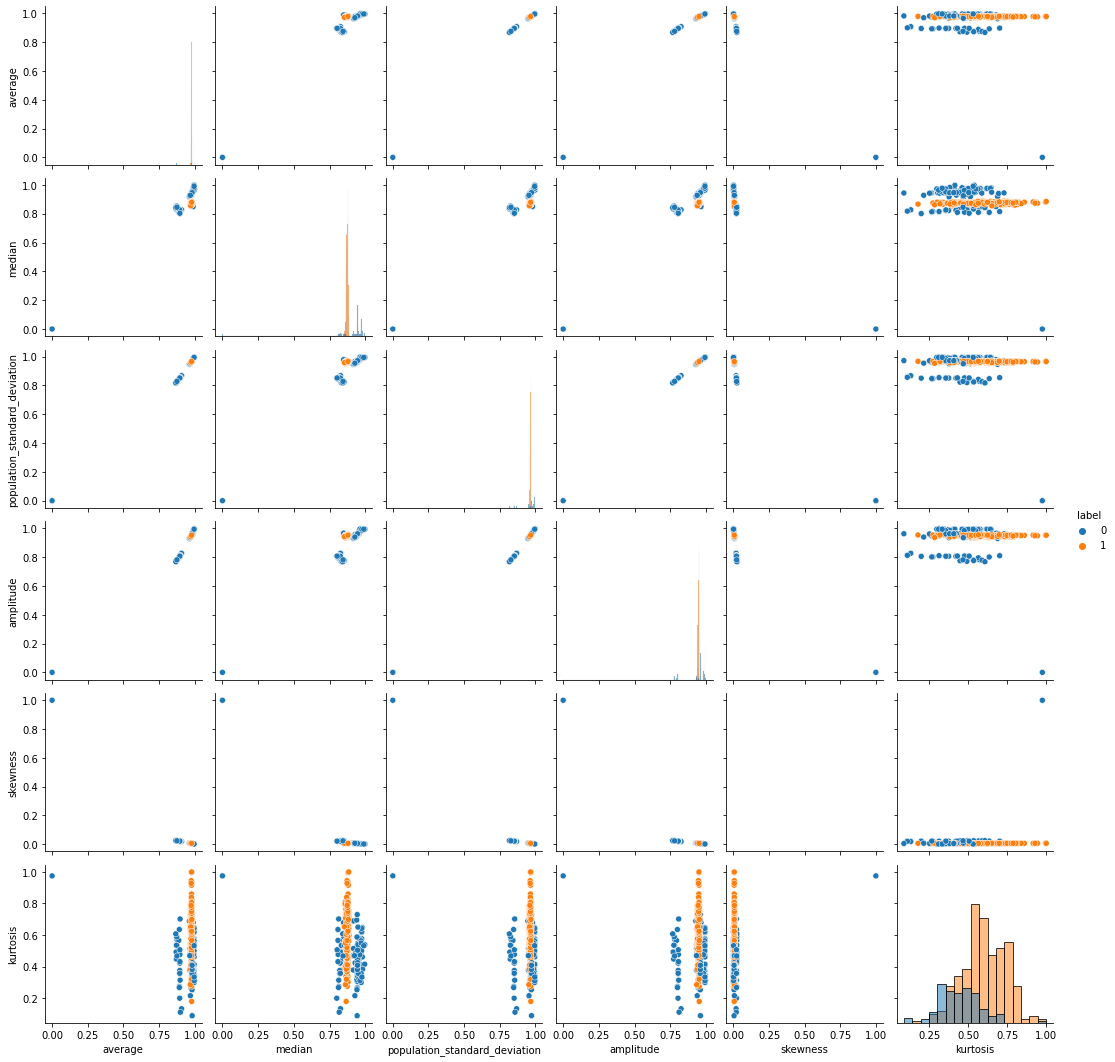

In [ ]:
sns.pairplot(df[col].sample(500), hue='label',diag_kind="hist")

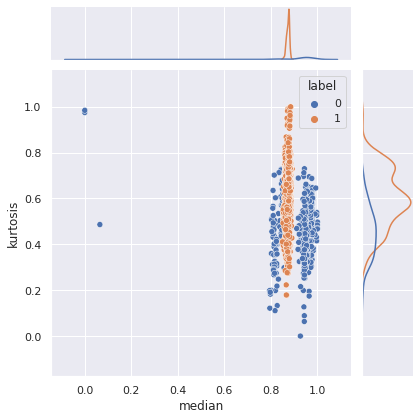

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.JointGrid(data=df, x="median", y="kurtosis", hue='label')

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

In [ ]:
df['median'].describe()

count    1717.000000
mean        0.884679
std         0.050845
min         0.000000
25%         0.869324
50%         0.875964
75%         0.880790
max         1.000000
Name: median, dtype: float64

In [ ]:
aa = np.array([1,2,3,4,5,6])
bb = np.array([1,2,3,1,2,3])

sum(aa == bb)

3

In [ ]:
aa == bb

array([ True,  True,  True, False, False, False])

In [ ]:
np.where(aa > 4, 1, 0)

array([0, 0, 0, 0, 1, 1])

In [ ]:
dummy_predicted = np.where((df['median'] > 0.86) & (df['median'] < 0.89), 1, 0)

In [ ]:
result = dummy_predicted == df['label']

print(len(result))

1717


In [ ]:
sum(result)

1673

In [ ]:
(sum(result) / len(result)) * 100

97.43739079790332

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(dummy_predicted, df['label'])

0.9743739079790332

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(dummy_predicted, df['label'])

array([[ 402,   43],
       [   1, 1271]])

In [ ]:
df.corr()

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
average,1.000000,0.801761,0.965296,0.038837,0.090119,0.931401,0.990202,0.990203,0.779930,0.777280,0.801761,0.817663,0.965296,0.906192,0.819087,0.819087,0.990314,-0.925718,-0.009727,0.151117
median,0.801761,1.000000,0.814316,0.017577,0.612753,0.543058,0.810740,0.810740,0.961343,0.976162,1.000000,0.984380,0.814316,0.766945,0.975010,0.975010,0.802936,-0.735105,-0.210377,-0.405371
maximum,0.965296,0.814316,1.000000,0.038538,0.164238,0.849704,0.992214,0.992213,0.788415,0.785528,0.814316,0.825732,1.000000,0.984422,0.827012,0.827012,0.923776,-0.806427,0.017963,0.140811
minimum,0.038837,0.017577,0.038538,1.000000,-0.035822,0.043224,0.039273,0.039273,0.014707,0.015853,0.017577,0.011124,0.038538,0.038878,0.009695,0.009695,0.035392,-0.031365,0.008549,0.034066
peak,0.090119,0.612753,0.164238,-0.035822,1.000000,-0.230840,0.123520,0.123518,0.588341,0.608760,0.612753,0.617416,0.164238,0.160543,0.612500,0.612500,0.104897,-0.052133,-0.265215,-0.742846
none_levated_peak,0.931401,0.543058,0.849704,0.043224,-0.230840,1.000000,0.898321,0.898322,0.528100,0.516299,0.543058,0.570013,0.849704,0.777911,0.578019,0.578019,0.932357,-0.907150,0.104447,0.436227
sample_standard_deviation,0.990202,0.810740,0.992214,0.039273,0.123520,0.898321,1.000000,1.000000,0.786714,0.783656,0.810740,0.824516,0.992214,0.956084,0.825991,0.825991,0.962889,-0.868653,0.008666,0.154739
population_standard_deviation,0.990203,0.810740,0.992213,0.039273,0.123518,0.898322,1.000000,1.000000,0.786714,0.783655,0.810740,0.824516,0.992213,0.956083,0.825991,0.825991,0.962890,-0.868655,0.008666,0.154740
percentile15,0.779930,0.961343,0.788415,0.014707,0.588341,0.528100,0.786714,0.786714,1.000000,0.974149,0.961343,0.951415,0.788415,0.740127,0.933942,0.933942,0.782522,-0.719034,-0.240759,-0.388003
percentile25,0.777280,0.976162,0.785528,0.015853,0.608760,0.516299,0.783656,0.783655,0.974149,1.000000,0.976162,0.966114,0.785528,0.736119,0.945407,0.945407,0.780967,-0.718677,-0.290815,-0.425553


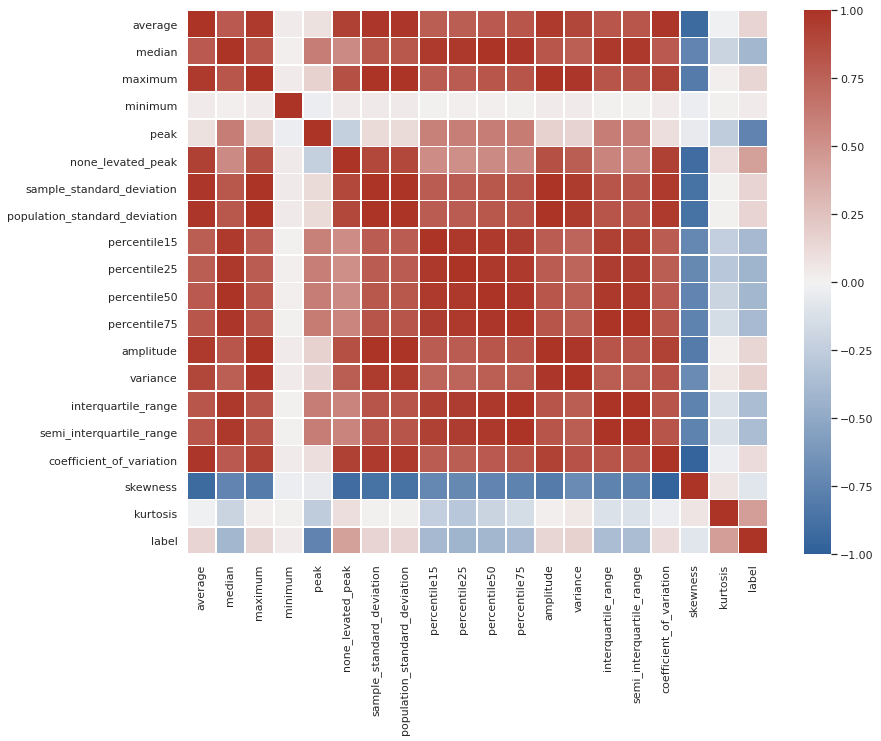

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, linewidths=.5, cmap=color_map)